## Introduction

The labels of each face image is embedded in the file name
, formated like [age]_[gender]_[race]_[date&time].jpg

 - **[age]** is an integer from **0 to 116**, indicating the age
 - **[gender]** is either **0 (male) or 1 (female)**
 - **[race]** is an integer from **0 to 4**, denoting _White, Black, Asian, Indian, and Others_ (like Hispanic, Latino, Middle Eastern).
 - **[date&time]** is in the format of **yyyymmddHHMMSSFFF**, showing the date and time an image was collected to UTKFace


Images Shape:
 - **200 x 200 x 3**

# IMPORTS

In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analysis Functions

In [2]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        image = cv2.imread(os.path.join(foldername,filename))
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

def show_all_images_from_list(img_list):
    n=int(len(img_list)/5) +1 
    f = plt.figure(figsize=(30,n*6))
    for i,img in enumerate(img_list):
        f.add_subplot(n, 5, i + 1)
        plt.imshow(img)

In [3]:
folder_path = "../data/UTKFace/"

In [4]:
img_list=load_images_from_folder(folder_path)

len(img_list)

23708

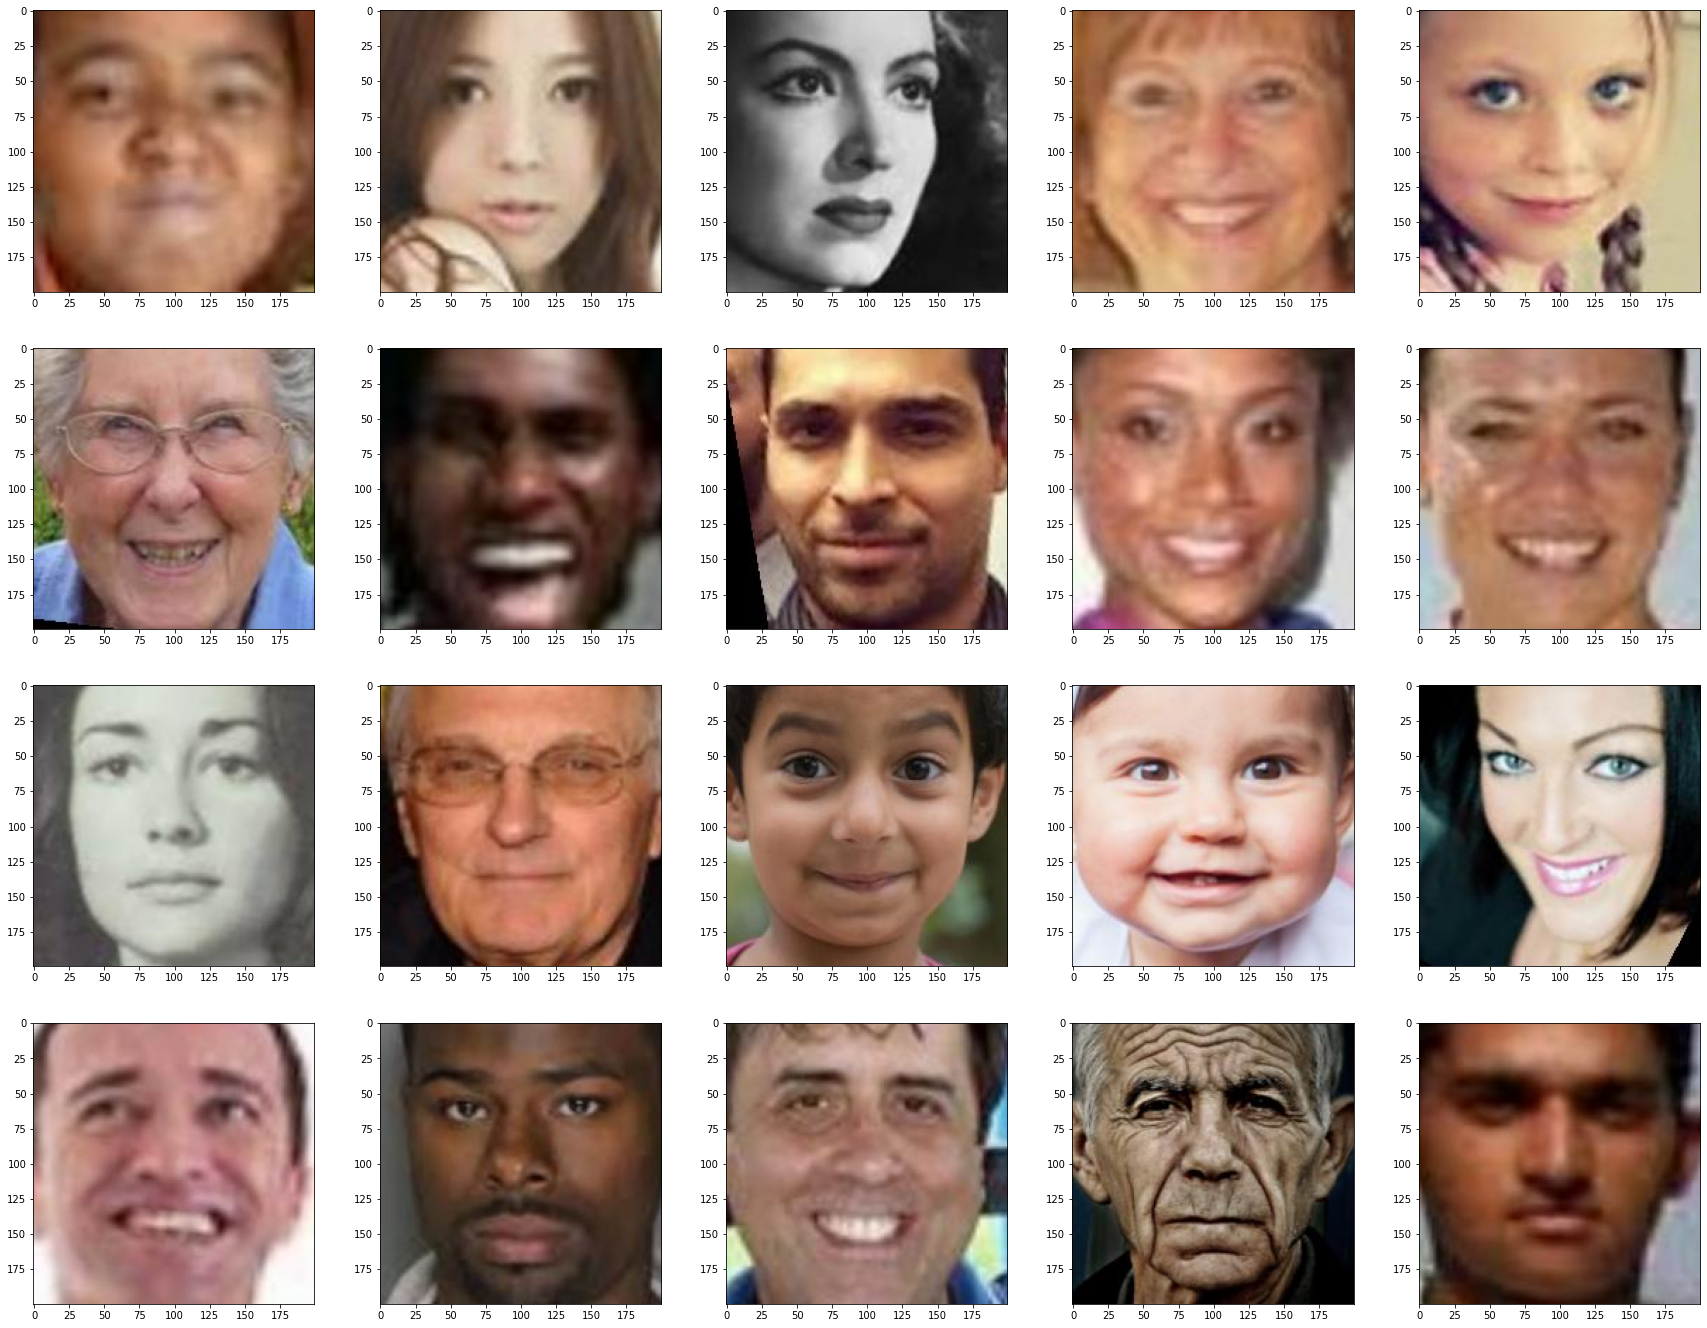

In [5]:
show_all_images_from_list(img_list[600:620])

## Info Extraction from Filename

In [6]:
print(os.path.splitext(folder_path)[0])

../data/UTKFace/


In [7]:
i = 0
df_info = pd.DataFrame()

for filename in os.listdir(folder_path):
    
    parsed_name = filename.split(sep="_")
    #print(parsed_name)
    
    df_info = df_info.append({'age' : parsed_name[0]
                   ,'gender' : parsed_name[1]
                   ,'race' : parsed_name[2]}, ignore_index=True)

In [8]:
df_info.head(20)

,age,gender,race
0,42,0,0
1,36,0,3
2,26,0,3
3,52,1,1
4,3,0,0
5,50,0,3
6,77,1,0
7,9,0,0
8,31,0,0
9,37,1,1


In [9]:
type(img_list)

list